# Some package and dataset

In [42]:
import numpy as np
import pandas as pd
from factor_analyzer import FactorAnalyzer,Rotator
import plotly.plotly as py
import plotly
import plotly.graph_objs as go

In [43]:
plotly.tools.set_credentials_file(username='Jianjoseph', api_key='6cBp5GMAfGaQv5L1O47Z')
plotly.tools.set_config_file(world_readable=True,
                             sharing='public')

In [3]:
Stock=pd.read_csv('/home/jzsyuan/python/Survey sampling /STOCK.csv')
Stock.head()

,jpmorgan,citibank,wellsfargo,shell,exxon
0,0.013034,-0.007843,-0.003189,-0.044769,0.005215
1,0.008486,0.016689,-0.006210,0.011956,0.013489
2,-0.017915,-0.008639,0.010036,0.000000,-0.006143
3,0.021559,-0.003486,0.017435,-0.028592,-0.006953
4,0.010822,0.003717,-0.010134,0.029190,0.040975


# Principal Component Method　(without package) 

In [4]:
R=Stock.corr()
Stock.corr()

,jpmorgan,citibank,wellsfargo,shell,exxon
jpmorgan,1.000000,0.632288,0.510497,0.114602,0.154463
citibank,0.632288,1.000000,0.574142,0.322292,0.212675
wellsfargo,0.510497,0.574142,1.000000,0.182499,0.146207
shell,0.114602,0.322292,0.182499,1.000000,0.683378
exxon,0.154463,0.212675,0.146207,0.683378,1.000000


In [44]:
eigenvalues, eigenvectors =np.linalg.eig(R)
lambda1=np.sqrt(eigenvalues)
loading=[]
number=range(0,2)
for num in number:
    temp=eigenvectors.T[num]*lambda1[num]
    loading=np.append(loading,temp,axis=0)
    
loading.shape=(2,5)
factor_loading=pd.DataFrame(np.transpose(loading),
                            columns=['Factor loading 1','Factor loading 2'])
factor_loading.index=Stock.columns
factor_loading

,Factor loading 1,Factor loading 2
jpmorgan,-0.732322,-0.436521
citibank,-0.831179,-0.280486
wellsfargo,-0.726202,-0.373858
shell,-0.604716,0.693957
exxon,-0.563088,0.718640


# Rotation (Varimax)

In [45]:
rotator = Rotator()
rotator.rotate(factor_loading, 'varimax')[0]

,Factor loading 1,Factor loading 2
jpmorgan,-0.851809,0.035589
citibank,-0.849120,0.220285
wellsfargo,-0.812385,0.084679
shell,-0.126167,0.911778
exxon,-0.077819,0.909646


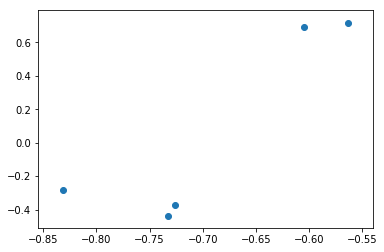


# MLE

In [9]:
factor= FactorAnalyzer()
factor.analyze(Stock, 2, rotation=None,method="mle")
factor.loadings.abs()

,Factor1,Factor2
jpmorgan,0.120191,0.659706
citibank,0.327548,0.686862
wellsfargo,0.187059,0.571435
shell,0.994981,0.006113
exxon,0.683411,0.023185
